In [3]:
from common_functions import *

1/1 [==============================] - 1s 599ms/step
('n03272010', 'electric_guitar', 0.7049317)


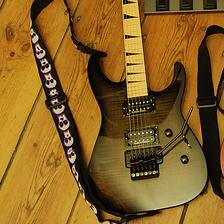

In [4]:
model = load_model();
rgb = png_to_rgb('imagenet_crops/guitar_01.png')
input_label, gradient = fgsm(model,rgb)
print(input_label)
show(rgb)

1/1 [==============================] - 0s 23ms/step
('n03272010', 'electric_guitar', 0.7257561)


2022-12-07 20:34:32.794296: I tensorflow_io/core/kernels/cpu_check.cc:128] Your CPU supports instructions that this TensorFlow IO binary was not compiled to use: AVX2 FMA


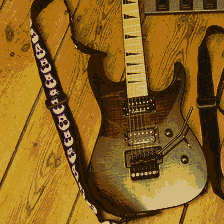

In [5]:
test_label, _ = fgsm(model,codec_gif(rgb))
print(test_label)
show(codec_gif(rgb))

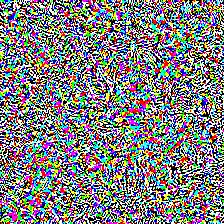

In [6]:
show_perturbation(tf.sign(gradient))

adding +- 1 to image
1/1 [==============================] - 0s 32ms/step
('n03272010', 'electric_guitar', 0.036709264)
ssim tf.Tensor(0.9991226, shape=(), dtype=float32)
adding +- 2 to image
1/1 [==============================] - 0s 22ms/step
('n03272010', 'electric_guitar', 0.018493928)
ssim tf.Tensor(0.9965308, shape=(), dtype=float32)
adding +- 4 to image
1/1 [==============================] - 0s 29ms/step
('n03495258', 'harp', 0.024901645)
ssim tf.Tensor(0.98671216, shape=(), dtype=float32)
adding +- 8 to image
1/1 [==============================] - 0s 29ms/step
('n03272010', 'electric_guitar', 0.035437513)
ssim tf.Tensor(0.9540557, shape=(), dtype=float32)
adding +- 16 to image
1/1 [==============================] - 0s 29ms/step
('n03272010', 'electric_guitar', 0.054794177)
ssim tf.Tensor(0.8727723, shape=(), dtype=float32)
adding +- 32 to image
1/1 [==============================] - 0s 24ms/step
('n03998194', 'prayer_rug', 0.26408425)
ssim tf.Tensor(0.73225814, shape=(), dtype=fl

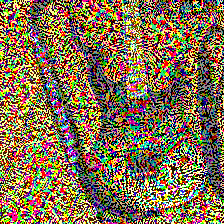

In [7]:
for bits in range(1,9):
    attacked_img = sg_attack(rgb,tf.sign(gradient),bits)
    attacked_label, _ = fgsm(model,attacked_img)
    print(attacked_label)
    print("ssim",tf.image.ssim_multiscale(rgb,attacked_img,255))
show(attacked_img)

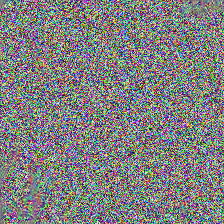

In [8]:
show_perturbation(gradient/np.mean(np.abs(gradient)))

adding +- 1 to image
1/1 [==============================] - 0s 28ms/step
('n03272010', 'electric_guitar', 0.025560454)
ssim tf.Tensor(0.9976366, shape=(), dtype=float32)
adding +- 2 to image
1/1 [==============================] - 0s 23ms/step
('n03272010', 'electric_guitar', 0.034098785)
ssim tf.Tensor(0.99189097, shape=(), dtype=float32)
adding +- 4 to image
1/1 [==============================] - 0s 23ms/step
('n03272010', 'electric_guitar', 0.045160193)
ssim tf.Tensor(0.97499895, shape=(), dtype=float32)
adding +- 8 to image
1/1 [==============================] - 0s 28ms/step
('n03272010', 'electric_guitar', 0.06598015)
ssim tf.Tensor(0.93280727, shape=(), dtype=float32)
adding +- 16 to image
1/1 [==============================] - 0s 23ms/step
('n01742172', 'boa_constrictor', 0.08601927)
ssim tf.Tensor(0.8443797, shape=(), dtype=float32)
adding +- 32 to image
1/1 [==============================] - 0s 28ms/step
('n02999410', 'chain', 0.2390823)
ssim tf.Tensor(0.6973402, shape=(), dtyp

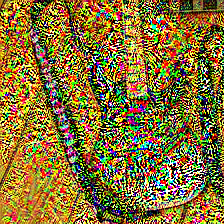

In [9]:
for bits in range(1,9):
    attacked_img = gradient_attack(rgb,gradient,bits)
    attacked_label, _ = fgsm(model,attacked_img)
    print(attacked_label)
    print("ssim",tf.image.ssim_multiscale(rgb,attacked_img,255))
show(attacked_img)